## Non-interacting system

In this notebook the results from running the gradient descent method for finding the optimal network parameters are shown. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


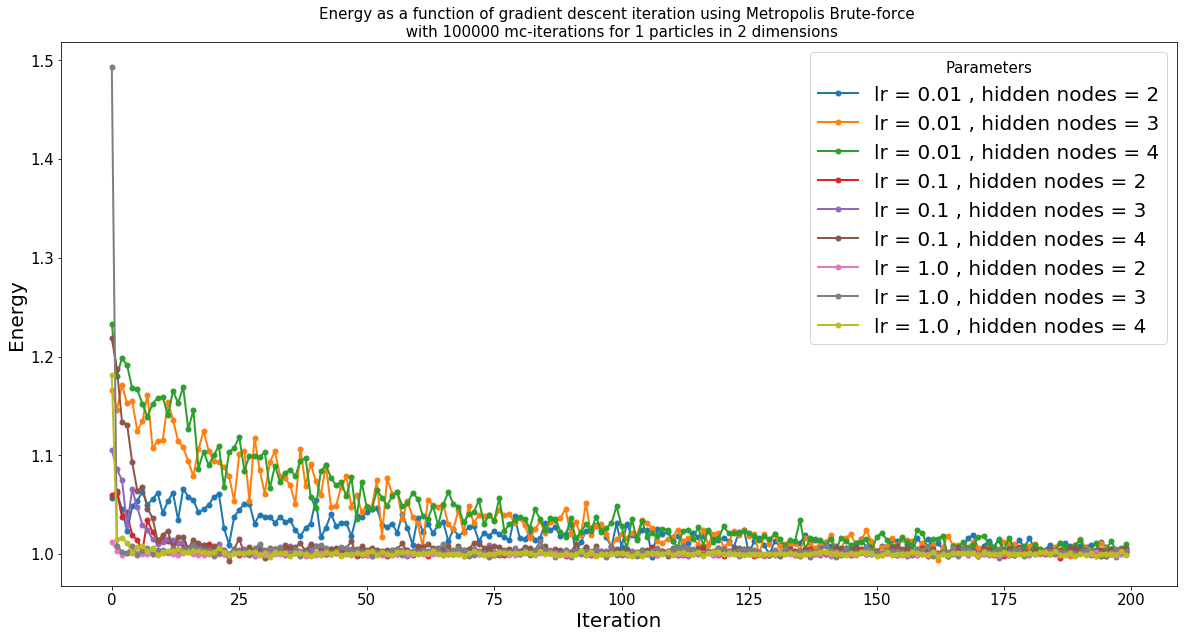

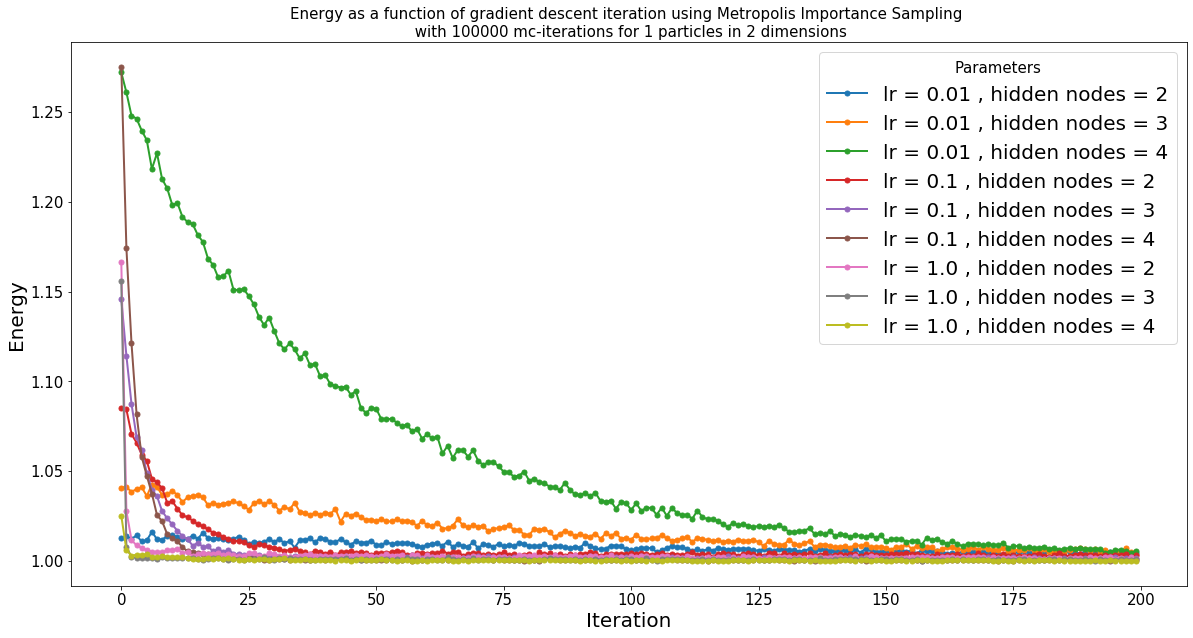

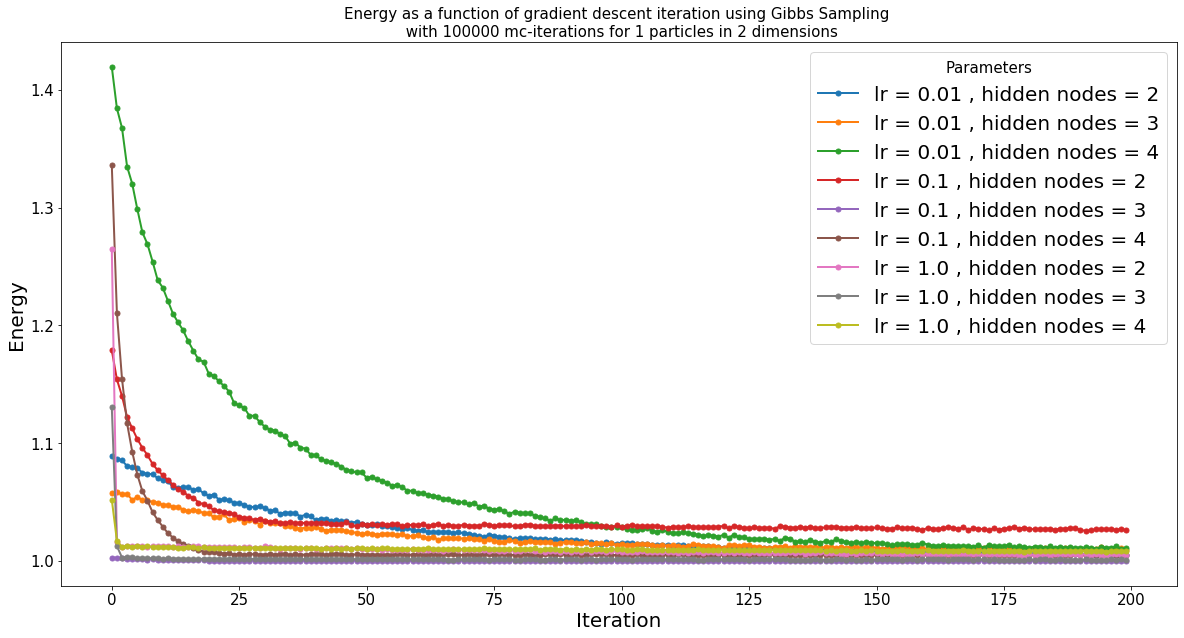

In [7]:
%load_ext autoreload
%autoreload 2

from plotting_tools import plot_energy

plot_energy("bf", "output/interacting_false/", 1, 2, 100000)
plot_energy("is", "output/interacting_false/", 1, 2, 100000)
plot_energy("gs", "output/interacting_false/", 1, 2, 100000)

In [35]:
import numpy as np 
import pandas as pd
import os

optimal_energies = []
time_values = []
network_architectures = []

n_particles = 1
n_dims = 2
iterations = 100000

for filename in os.listdir("output/interacting_false/bf"):
    temp = filename.split("_")
    if int(temp[2]) == n_particles and int(temp[5]) == n_dims and int(temp[-1].split(".")[0]) == iterations:
        info = open("output/interacting_false/bf/" + filename).readlines()[0].split(" ")
        local_energies = np.loadtxt("output/interacting_false/bf/" + filename, skiprows=1)
        optimal_energies.append(float(f"{local_energies[-1]:.4f}"))
        time = float(info[1].split("=")[1])
        time_values.append(float(f"{time:.4f}"))
        network_architectures.append("lr = " + str(temp[7]) + " , hidden nodes = " + str(temp[9]))

print(optimal_energies)
print(time_values)
print(network_architectures)

exact_value = 0.5*n_particles*n_dims

errors = np.array(optimal_energies) - exact_value
relative_errors = abs(errors)/exact_value

df = pd.DataFrame({"Network Architecture": network_architectures, "Optimal Energy": optimal_energies, "Abs error": abs(errors), "Rel error": relative_errors, "Time [s]": time_values}) 
df.style.set_properties(**{"text_align": "right"})
print(df.to_latex(index=False))

[1.0025, 1.0046, 1.0098, 1.0027, 1.0011, 1.0065, 0.9999, 1.0028, 0.9989]
[27.068, 34.85, 31.678, 27.655, 32.172, 31.641, 26.881, 29.912, 32.41]
['lr = 0.01 , hidden nodes = 2', 'lr = 0.01 , hidden nodes = 3', 'lr = 0.01 , hidden nodes = 4', 'lr = 0.1 , hidden nodes = 2', 'lr = 0.1 , hidden nodes = 3', 'lr = 0.1 , hidden nodes = 4', 'lr = 1.0 , hidden nodes = 2', 'lr = 1.0 , hidden nodes = 3', 'lr = 1.0 , hidden nodes = 4']
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          1.0025 &     0.0025 &     0.0025 &    27.068 \\
 lr = 0.01 , hidden nodes = 3 &          1.0046 &     0.0046 &     0.0046 &    34.850 \\
 lr = 0.01 , hidden nodes = 4 &          1.0098 &     0.0098 &     0.0098 &    31.678 \\
  lr = 0.1 , hidden nodes = 2 &          1.0027 &     0.0027 &     0.0027 &    27.655 \\
  lr = 0.1 , hidden nodes = 3 &          1.0011 &     0.0011 &     0.0011 &    32.172 \

In [8]:
%load_ext autoreload
%autoreload 2

from plotting_tools import create_table_non_interacting

create_table_non_interacting("bf", "output/interacting_false/", 1, 2, 100000)
create_table_non_interacting("is", "output/interacting_false/", 1, 2, 100000)
create_table_non_interacting("gs", "output/interacting_false/", 1, 2, 100000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
\begin{table}
\centering
\caption{Optimal energy, error and time for different network architectures using Metropolis Brute-force on a non-interacting system with 1 particles in 2 dimensions. Using $\sigma^2 = $1.0, MC-iterations = 100000 and MC step-length = 0.5}
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          1.0056 &     0.0056 &     0.0056 &    27.068 \\
 lr = 0.01 , hidden nodes = 3 &          1.0053 &     0.0053 &     0.0053 &    34.850 \\
 lr = 0.01 , hidden nodes = 4 &          1.0063 &     0.0063 &     0.0063 &    31.678 \\
  lr = 0.1 , hidden nodes = 2 &          1.0014 &     0.0014 &     0.0014 &    27.655 \\
  lr = 0.1 , hidden nodes = 3 &          1.0005 &     0.0005 &     0.0005 &    32.172 \\
  lr = 0.1 , hidden nodes = 4 &          1.0032 &     0.0032 &     0.003